<a href="https://colab.research.google.com/github/daloqily/data-science/blob/main/student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# preliminary data analysis 

**Data analysis of student performances in the dataset**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url='https://drive.google.com/file/d/1hDcZEvrHsLfcZpxOmJ3L-diM5QA3aI-n/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df.shape
(1000,8)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data processing using pandas & numpy

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
print("missing data in columns")
df.isnull().sum()

missing data in columns


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
print("Types of data in columns")
df.dtypes

Types of data in columns


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

** Categorical Variables **

gender                         
race/ethnicity                
parental level of education    
lunch                          
test preparation course  =>  ( 0: none - 1:completed) 

In [ ]:
df.describe(include = ['O'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


# create a new data frame that has the mean of total scores in an new column 

In [ ]:
df_scores_mean = df[['gender','race/ethnicity','parental level of education','lunch','test preparation course','writing score','reading score','math score']].copy()
df_scores_mean['scores_mean']=''
df_scores_mean.columns= df_scores_mean.columns.str.replace(' ', '_')
df_scores_mean.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,writing_score,reading_score,math_score,scores_mean
0,female,group B,bachelor's degree,standard,none,74,72,72,
1,female,group C,some college,standard,completed,88,90,69,
2,female,group B,master's degree,standard,none,93,95,90,
3,male,group A,associate's degree,free/reduced,none,44,57,47,
4,male,group C,some college,standard,none,75,78,76,


In [ ]:
df_scores_mean['scores_mean'] = df_scores_mean[['writing_score','reading_score','math_score']].mean(axis=1)

df_scores_mean.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,writing_score,reading_score,math_score,scores_mean
0,female,group B,bachelor's degree,standard,0,74,72,72,72.666667
1,female,group C,some college,standard,1,88,90,69,82.333333
2,female,group B,master's degree,standard,0,93,95,90,92.666667
3,male,group A,associate's degree,free/reduced,0,44,57,47,49.333333
4,male,group C,some college,standard,0,75,78,76,76.333333


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sb

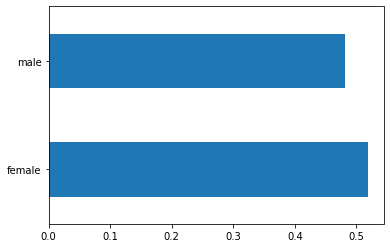

In [ ]:
df_scores_mean['gender'].value_counts(normalize=True).plot(kind='barh')

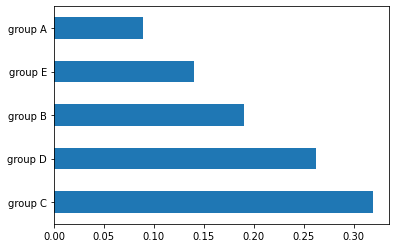

In [ ]:
df_scores_mean['race/ethnicity'].value_counts(normalize=True).plot(kind='barh')

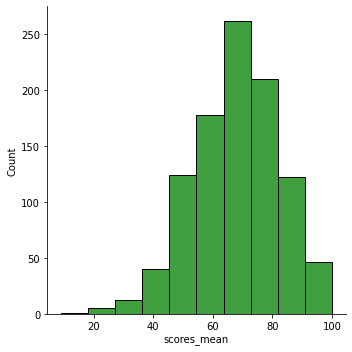

In [ ]:
sb.displot(df_scores_mean['scores_mean'], color='g', bins=10)

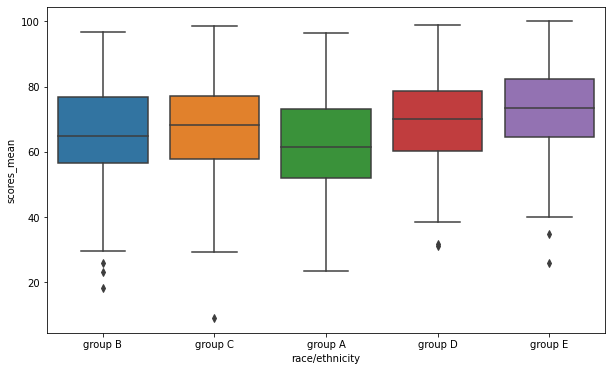

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(x=df_scores_mean['race/ethnicity'], y=df_scores_mean['scores_mean'])

**` At first insight, it is concluded that group E has the highest mean scores`**

# Covert categorical variables to numeric for correlation calculations


In [ ]:
df.columns= df.columns.str.replace(' ', '_')

In [ ]:
df['test_preparation_course'] = pd.factorize(df['test_preparation_course'])[0]
df['race/ethnicity'] = pd.factorize(df['race/ethnicity'])[0]
df['parental_level_of_education'] = pd.factorize(df['parental_level_of_education'])[0]
df['lunch'] = pd.factorize(df['lunch'])[0]

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,0,0,0,0,72,72,74
1,female,1,1,0,1,69,90,88
2,female,0,2,0,0,90,95,93
3,male,2,3,1,0,47,57,44
4,male,1,1,0,0,76,78,75


In [ ]:
df['test_preparation_course']=df['test_preparation_course'].astype('int64')
df['race/ethnicity']=df['race/ethnicity'].astype('int64')
df['parental_level_of_education']=df['parental_level_of_education'].astype('int64')
df['lunch']=df['lunch'].astype('int64')


In [ ]:
df.dtypes

gender                         object
race/ethnicity                  int64
parental_level_of_education     int64
lunch                           int64
test_preparation_course         int64
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [ ]:
df_num = df.select_dtypes(include = ['float64','int64'])
#df_num.drop(df_num.columns[[7]], axis=1, inplace=True)
df_num.head()

,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,0,0,0,72,72,74
1,1,1,0,1,69,90,88
2,0,2,0,0,90,95,93
3,2,3,1,0,47,57,44
4,1,1,0,0,76,78,75


In [108]:
#print(df_num.corr())

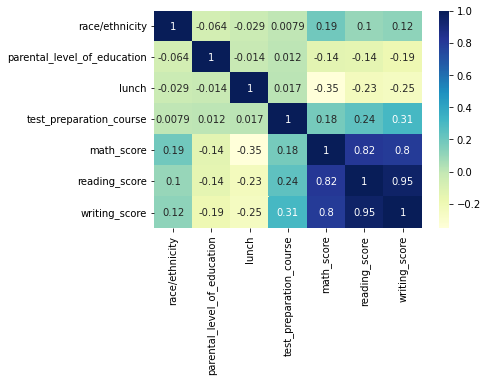

In [ ]:
dataplot = sb.heatmap(df_num.corr(), cmap="YlGnBu", annot=True)


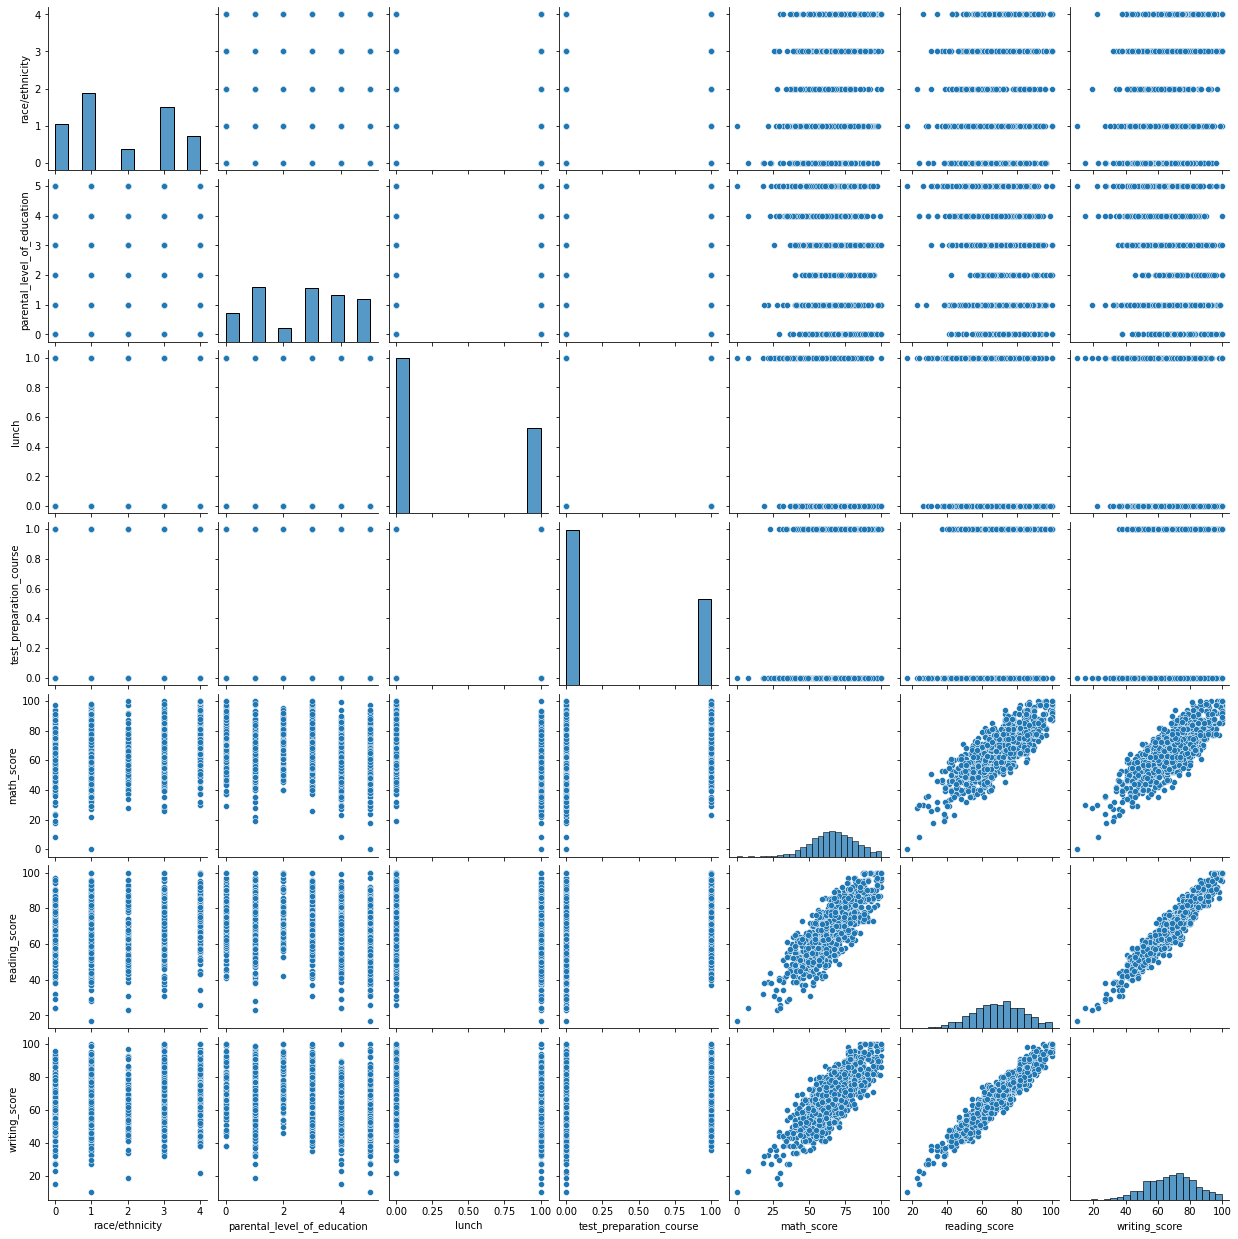

In [111]:
sb.pairplot(df_num)

# Outcome


From the heatmap, correlations are:

correlations near +1 between variables means they are positevley correliated, such as reading_score & writing score (0.95)

correlations near 0 between variables means there is no linear trend, such as test_preperation_course &  race/ethnicity (0.0079)


* It is important to note that correlation does not mean causation